# Regression Models 

### Import Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization

In [93]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


Import the cleaned dataset with no outliers 

In [94]:
df = pd.read_csv('CO2 Emissions_Canada_cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 6282
Number of columns: 12


In [95]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Number of Gears
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,196,5.0
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,221,6.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,136,7.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,255,6.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,244,6.0


# Regression Models 1: One-hot encoding 



### Predictive Model


We need all the data to be numerical.
We can use the
function pertaining to pandas.

Count the number of times a unique value appear in fuel type

In [96]:
n_values_count = df['Fuel Type'].value_counts()

# Display the count of 'N' values
print("Number of 'N' values in the 'Fuel Type' column:", n_values_count.get('N', 0))

Number of 'N' values in the 'Fuel Type' column: 1


Want to make a copy of the categorical values 

In [97]:
# Assuming 'df' is your original DataFrame
# List of categorical column names
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Cylinders', 'Transmission', 'Fuel Type']

# Create a new DataFrame containing only the specified categorical columns from the original DataFrame
categorical_df = df[categorical_columns].copy()

# Now, 'categorical_df' is a new DataFrame containing only the categorical data


In [98]:
print(categorical_df.head(10))


    Make       Model Vehicle Class  Cylinders Transmission Fuel Type
0  ACURA         ILX       COMPACT          4           AS         Z
1  ACURA         ILX       COMPACT          4            M         Z
2  ACURA  ILX HYBRID       COMPACT          4           AV         Z
3  ACURA     MDX 4WD   SUV - SMALL          6           AS         Z
4  ACURA     RDX AWD   SUV - SMALL          6           AS         Z
5  ACURA         RLX      MID-SIZE          6           AS         Z
6  ACURA          TL      MID-SIZE          6           AS         Z
7  ACURA      TL AWD      MID-SIZE          6           AS         Z
8  ACURA      TL AWD      MID-SIZE          6            M         Z
9  ACURA         TSX       COMPACT          4           AS         Z


In [99]:
# corresponding column prefixes used for one-hot encoding
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Cylinders', 'Transmission', 'Fuel Type']


# display unique values of categorical columns before encoding
print("Unique values before encoding: ")
for column in categorical_columns:
    print(column, ":", df[column].unique())

Unique values before encoding: 
Make : ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
Model : ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
Vehicle Class : ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
Cylinders : [ 4  6 12  8 10  3  5 16]
Transmission : ['AS' 'M' 'AV' 'AM' 'A']
Fuel Type : ['Z' 'D' 'X' 'E' 'N']


Use one hot encoding 

In [100]:
for column in categorical_columns:
    # Perform one-hot encoding, add a prefix, and drop the first column to avoid multicollinearity
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    # Drop the original column from df
    df = df.drop(column, axis=1)
    # Join the dummy columns to df
    df = df.join(dummies)

# Assuming 'CO2 Emissions(g/km)' is your target variable and exists in your original DataFrame 'df'
labels = df['CO2 Emissions(g/km)']

# Assuming you want to drop some columns including 'Model' and the target variable 'CO2 Emissions(g/km)' after encoding
emissions_to_drop = ['Model', 'CO2 Emissions(g/km)']
# If you also meant to drop original categorical columns (already encoded), add them here
# But since they were already dropped in the loop above, this might be unnecessary

# Update list based on your needs
print(emissions_to_drop)

['Model', 'CO2 Emissions(g/km)']


In [101]:
# Load and display the initial DataFrame
df = pd.read_csv('CO2 Emissions_Canada_cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)

print("Number of rows before dropping 'Model' and 'CO2 Emissions(g/km)':", df.shape[0])

# Save the target variable and then drop the columns 'Model' and 'CO2 Emissions(g/km)'
labels = df['CO2 Emissions(g/km)'].copy()
df.drop(['Model', 'CO2 Emissions(g/km)'], axis=1, inplace=True, errors='ignore')

# The number of rows will not change after dropping columns, as columns are being removed, not rows.
# However, let's display the number of rows to confirm.
print("Number of rows after dropping 'Model' and 'CO2 Emissions(g/km)':", df.shape[0])

# List of remaining categorical column names to encode
categorical_columns = ['Make', 'Vehicle Class', 'Cylinders', 'Transmission', 'Fuel Type']

# Perform one-hot encoding for the categorical data
for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df.drop(column, axis=1, inplace=True)  # Drop the original column from df
    df = df.join(dummies)  # Join the dummy columns to df

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# The rest of the code for splitting the data, training, and evaluating the model can follow here.
df_imputed.head()


Number of rows before dropping 'Model' and 'CO2 Emissions(g/km)': 6282
Number of rows after dropping 'Model' and 'CO2 Emissions(g/km)': 6282


,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Number of Gears,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,...,Cylinders_12,Cylinders_16,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,9.9,6.7,8.5,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,11.2,7.7,9.6,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.5,6.0,5.8,5.9,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.5,12.7,9.1,11.1,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,12.1,8.7,10.6,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [102]:
print("Number of rows:", df_imputed.shape[0])
print("Number of columns:", df_imputed.shape[1])


Number of rows: 6282
Number of columns: 76


By printing the number of rows and columns, the number of rows did not change but the number of columns changed from 12 to 76. This states that there is no data lost during the process of dropping columns but there are some columns created by changing categorical data to numerical data. 

In [103]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_imputed, labels, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and calculate the mean squared error
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, print the coefficients of the model
#print("Coefficients:", lr_model.coef_)


Mean Squared Error: 37.367023440923596


In [104]:
print(df_imputed.dtypes)

Engine Size(L)                      float64
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Number of Gears                     float64
                                     ...   
Transmission_M                      float64
Fuel Type_E                         float64
Fuel Type_N                         float64
Fuel Type_X                         float64
Fuel Type_Z                         float64
Length: 76, dtype: object


Check all variables(previously categorical/ numerical) are integer values 

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print("The labels are:" ,  labels)

X_train, X_test, y_train, y_test = train_test_split(df_imputed, labels, test_size = 0.3, random_state = 0)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

lin_reg_enc = LinearRegression().fit(X_train, y_train)
print('The coefficient of determination (R^2) of the prediction, for continuous variables only linear regressions model: ')
print(lin_reg_enc.score(X_test, y_test))

The labels are: 0       196
1       221
2       136
3       255
4       244
       ... 
6277    219
6278    232
6279    240
6280    232
6281    248
Name: CO2 Emissions(g/km), Length: 6282, dtype: int64
Train Set : (4397, 76) (4397,)
Test Set  : (1885, 76) (1885,)
The coefficient of determination (R^2) of the prediction, for continuous variables only linear regressions model: 
0.9895545580479367


Since the R^2 value is relatively close to the optimal value of 1, the linear regression line fits the model relatively well. 

In [119]:
# Coefficients of the Linear Regression line
# find a and b 
print('Intercept \t: b = ', lin_reg_enc.intercept_)
print('Coefficients \t: a = ', lin_reg_enc.coef_)


Intercept 	: b =  30.81295704025456
Coefficients 	: a =  [ 2.87375565e-01  6.54803358e+00  4.97828327e+00  1.05435220e+01
  5.37924734e-01  3.53955794e+00  4.24503993e+00  2.00873527e+00
  3.55435444e+00  1.55208298e+00  9.69294503e+00  3.94472867e+00
  1.96072856e+00  3.60641796e+00  6.94040057e+00  6.44360833e+00
  3.56723644e+00  5.40450798e+00  5.94431877e+00  4.04736265e+00
  2.66061826e+00  3.32694220e+00  2.75327539e+00  2.64615672e+00
  4.95982234e+00  3.68358791e+00  3.41469532e+00  4.03498955e-01
  1.35717789e+00  4.07226332e+00  5.07899799e+00  2.10001704e+00
  2.99739818e+00  1.66889881e+00  2.52257939e+00  4.45903525e+00
  2.40312311e+00  5.83864248e+00  2.25867653e+00  1.83325846e+00
 -1.89267735e+00  3.94561415e-01  3.38195779e+00  2.68008364e+00
  2.02004244e+00  1.67744625e+00  2.58555343e-01 -7.28083289e-01
 -9.19064741e-01  3.57956523e-01  4.36555482e+00  1.07908601e+00
  2.38782309e+00 -1.91309683e-01 -4.28675599e-01 -4.21499545e-01
  1.04942228e+00  1.13387745e+00 

In [120]:
y_train_pred = lin_reg_enc.predict(X_train)
y_test_pred = lin_reg_enc.predict(X_test)

##Plot the regression line 

ValueError: x and y must be the same size

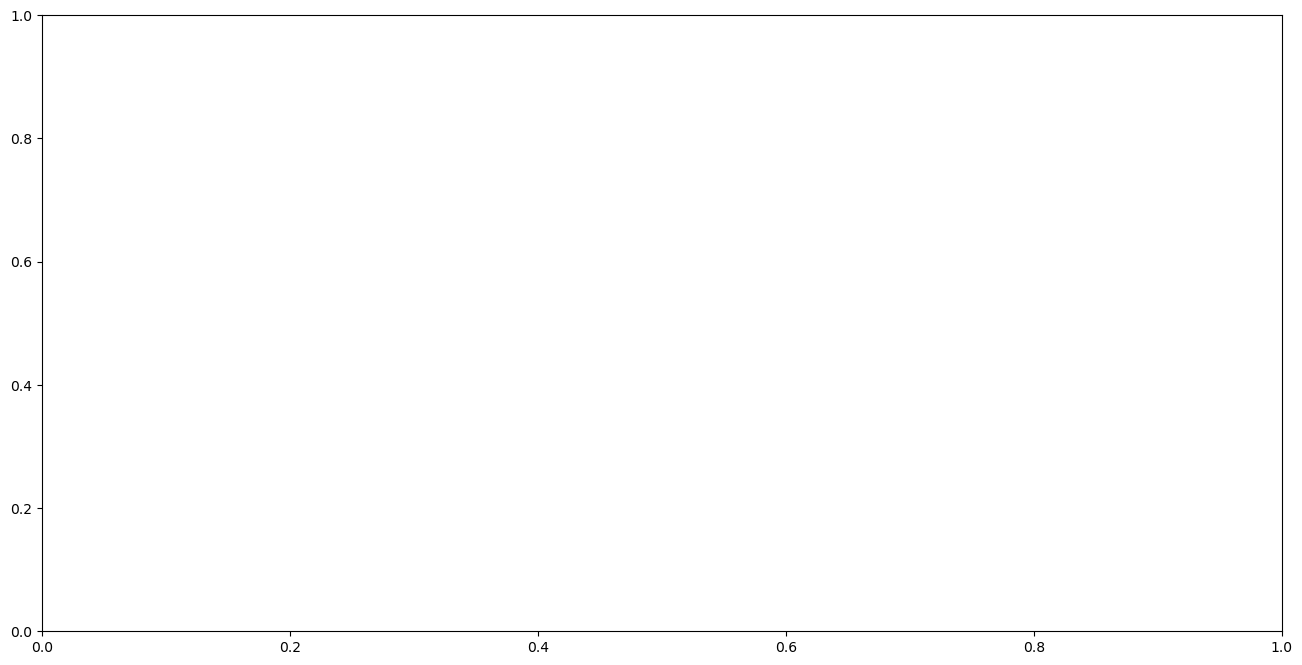

In [121]:
# Predict Total values corresponding to HP Train
#take the x values to predict the y values 
y_train_pred =lin_reg_enc.predict(X_train)

# Plot the Linear Regression line
# y = mx+c 
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

# gap between blue point and red point is the errors 